# Integrantes:

* Andresa Bicudo
* Gabriel Yamashita
* Leonardo Malta

----

# Introdução 
A pandemia do corona vírus fez com que o futebol parasse, inclusive o campeonato inglês (Premiere League). Existem campeonatos que foram interrompidos, como o campeonato francês, mesmo sem ter finalizado todos os jogos e também há campeonatos que retonaram porém com desempenhos diferentes de cada equipe. Isso fez com que surgisse o seguinte questionamento: o que provavelmente ocorreria com o campeonato inglês se a pandemia não tivesse a interrompido?

----

# Objetivo:
Prever o restante do campeonato inglês com base no desempenho e estatísitcas das equipes até a 30ª rodada. 

----

# Imports:

In [127]:
# Importanto Bibliotecas para o Trabalho:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm

import scipy as scp
import sklearn

from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
#from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

----

# Separação dos Dados:

In [128]:
dados = pd.read_excel('masterdata.xlsx')
dados.head(5)

,MatchID,Home_team,Away_team,Score_home,Score_away,Possession_home,Possession_away,Shots_on_target_home,Shots_on_target_away,Shots_home,Shots_away,Touches_home,Touches_away,Passes_home,Passes_away,Tackles_home,Tackles_away,Clearances_home,Clearances_away,Corners_home,Corners_away,Offsides_home,Offsides_away,Yellow_cards_home,Yellow_cards_away,Fouls_conceded_home,Fouls_conceded_away,Red_cards_home,Red_cards_away,year,Expenditures_home,Arrivals_home,Income_home,Departures_home,Expenditures_away,Arrivals_away,Income_away,Departures_away
0,5937,Blackburn,Reading,3,3,54.0,46.0,6,4,15,11,553,464,356,287,22,13,33,19,5,10,5,3,2,0,18,7,0,0,2007,18.84,21,19.28,25,10.52,25,0.00,19
1,5938,Bolton,Aston Villa,2,2,47.1,52.9,2,2,11,7,457,493,318,343,24,15,23,20,7,6,0,2,2,1,10,11,0,0,2007,19.38,16,4.39,16,28.16,17,2.08,18
2,5939,Chelsea,Everton,1,1,59.3,40.7,7,6,20,11,615,471,425,305,23,22,10,28,10,2,6,2,2,1,13,7,0,0,2007,101.43,23,59.96,22,20.41,11,2.85,16
3,5940,Liverpool,Charlton,2,2,61.6,38.4,5,4,23,9,632,420,453,271,20,14,22,29,9,2,6,4,0,0,5,13,0,0,2007,52.44,27,23.94,28,24.68,31,2.59,36
4,5941,Man Utd,West Ham,0,1,65.3,34.7,7,2,30,8,825,506,619,333,28,26,18,47,14,3,0,1,0,2,13,12,0,0,2007,31.01,25,20.52,29,79.63,22,7.70,23


In [129]:
def Determina_Resultado(df, home, away):
    if df[home] > df[away]:
        return 0
    elif df[home] < df[away]:
        return 2
    elif df[home] == df[away]:
        return 1


dados['Result'] = dados.apply(
    lambda dados: Determina_Resultado(dados, 'Score_home', 'Score_away'), axis=1)
dados.head(5)

,MatchID,Home_team,Away_team,Score_home,Score_away,Possession_home,Possession_away,Shots_on_target_home,Shots_on_target_away,Shots_home,Shots_away,Touches_home,Touches_away,Passes_home,Passes_away,Tackles_home,Tackles_away,Clearances_home,Clearances_away,Corners_home,Corners_away,Offsides_home,Offsides_away,Yellow_cards_home,Yellow_cards_away,Fouls_conceded_home,Fouls_conceded_away,Red_cards_home,Red_cards_away,year,Expenditures_home,Arrivals_home,Income_home,Departures_home,Expenditures_away,Arrivals_away,Income_away,Departures_away,Result
0,5937,Blackburn,Reading,3,3,54.0,46.0,6,4,15,11,553,464,356,287,22,13,33,19,5,10,5,3,2,0,18,7,0,0,2007,18.84,21,19.28,25,10.52,25,0.00,19,1
1,5938,Bolton,Aston Villa,2,2,47.1,52.9,2,2,11,7,457,493,318,343,24,15,23,20,7,6,0,2,2,1,10,11,0,0,2007,19.38,16,4.39,16,28.16,17,2.08,18,1
2,5939,Chelsea,Everton,1,1,59.3,40.7,7,6,20,11,615,471,425,305,23,22,10,28,10,2,6,2,2,1,13,7,0,0,2007,101.43,23,59.96,22,20.41,11,2.85,16,1
3,5940,Liverpool,Charlton,2,2,61.6,38.4,5,4,23,9,632,420,453,271,20,14,22,29,9,2,6,4,0,0,5,13,0,0,2007,52.44,27,23.94,28,24.68,31,2.59,36,1
4,5941,Man Utd,West Ham,0,1,65.3,34.7,7,2,30,8,825,506,619,333,28,26,18,47,14,3,0,1,0,2,13,12,0,0,2007,31.01,25,20.52,29,79.63,22,7.70,23,2


----

# Obtendo Variáveis de Interesse  

In [130]:
# Definindo variáveis imortantes: 
stats = dados.drop(columns=[
    'MatchID', 'Home_team', 'Away_team', 'Score_home', 'Score_away',
    'year', 'Result'
])

games = dados.loc[: , ['Home_team', 'Away_team']]
results = dados.loc[: , ['Result']]

stats.head(5)

,Possession_home,Possession_away,Shots_on_target_home,Shots_on_target_away,Shots_home,Shots_away,Touches_home,Touches_away,Passes_home,Passes_away,Tackles_home,Tackles_away,Clearances_home,Clearances_away,Corners_home,Corners_away,Offsides_home,Offsides_away,Yellow_cards_home,Yellow_cards_away,Fouls_conceded_home,Fouls_conceded_away,Red_cards_home,Red_cards_away,Expenditures_home,Arrivals_home,Income_home,Departures_home,Expenditures_away,Arrivals_away,Income_away,Departures_away
0,54.0,46.0,6,4,15,11,553,464,356,287,22,13,33,19,5,10,5,3,2,0,18,7,0,0,18.84,21,19.28,25,10.52,25,0.00,19
1,47.1,52.9,2,2,11,7,457,493,318,343,24,15,23,20,7,6,0,2,2,1,10,11,0,0,19.38,16,4.39,16,28.16,17,2.08,18
2,59.3,40.7,7,6,20,11,615,471,425,305,23,22,10,28,10,2,6,2,2,1,13,7,0,0,101.43,23,59.96,22,20.41,11,2.85,16
3,61.6,38.4,5,4,23,9,632,420,453,271,20,14,22,29,9,2,6,4,0,0,5,13,0,0,52.44,27,23.94,28,24.68,31,2.59,36
4,65.3,34.7,7,2,30,8,825,506,619,333,28,26,18,47,14,3,0,1,0,2,13,12,0,0,31.01,25,20.52,29,79.63,22,7.70,23


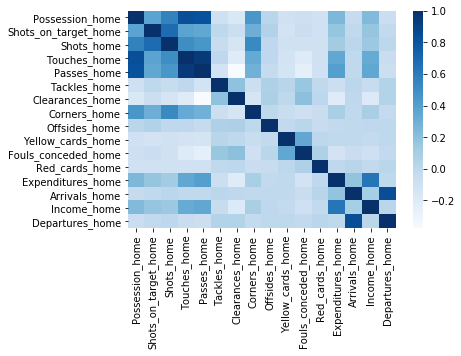

In [131]:
# Obtendo a correlação dos dados para times que jogam em seu estádio:
home_features = [i for i in list(stats) if '_home' in i]
corr = stats[home_features].corr()
sns.heatmap(corr, cmap="Blues")

A partir da análise do heatmap, é possível saber se duas variáveis estão medindo características similares. Por exemplo, a quantidade de passes ("touches_home") está muito interligada com a posse de bola. Para eliminar as variáveis que se relacionam, usa-se o "Variance Inflation Factor", que é um fator que indentifica multicolinearidade de duas variáveis. Valores maiores que 5 significa que há muita correlação. Mais informações em: https://www.statisticshowto.com/variance-inflation-factor/.

In [132]:
# Enumera elementos de uma lista para percorrer com o for
enumerate(list(stats))

In [133]:
variance_inflation = []
for i, feature in enumerate(list(stats)):
    vif_tup = (feature, variance_inflation_factor(stats.values, i))
    variance_inflation.append(vif_tup)

relevant_features = []

for i in range(len(variance_inflation)):
    if variance_inflation[i][1] < 5:
        relevant_features.append(variance_inflation[i][0])

relevant_features

['Offsides_home',
 'Offsides_away',
 'Yellow_cards_home',
 'Yellow_cards_away',
 'Red_cards_home',
 'Red_cards_away',
 'Expenditures_home',
 'Income_home',
 'Expenditures_away',
 'Income_away']

----

# Random Forest - Tentativa 1 

In [134]:
# Predição variáveis com variance inflation menores que 5:
X = (stats.loc[: , relevant_features]).values
y = results.values

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42)

classificador_RF = RandomForestClassifier(n_estimators=500, random_state=42)
classificador_RF.fit(X_train, y_train)

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [136]:
y_pred = classificador_RF.predict(X_test)
print('Acurácia do modelo Random Forest:', accuracy_score(y_test, y_pred))

Acurácia do modelo Random Forest: 0.5252192982456141


----

# Random Forest - Tentativa 2

In [137]:
# Teste sem retirada das variáveis
X1 = stats.values
y1 = results.values

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = .25, random_state = 42)

classificador_RF1 = RandomForestClassifier(n_estimators=500,random_state=42)
classificador_RF1.fit(X_train1, y_train1)

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [138]:
y_pred1 = classificador_RF1.predict(X_test1)
print('Acurácia do modelo Random Forest com todas as variáveis:', accuracy_score(y_test1, y_pred1))

Acurácia do modelo Random Forest com todas as variáveis: 0.6145741878841089


A conclusão que pode ser feita é a de que a "variance inflation" não é um bom parâmetro para determinar variáveis importantes. 

----

# Regressão Multinomianal - Tentativa 1

In [139]:
logit_model = sm.MNLogit(endog=y_train1.flatten(), exog=X_train1)
result = logit_model.fit()

stats1 = result.summary()
stats2 = result.summary2()

print(stats1)

Optimization terminated successfully.
         Current function value: 0.774372
         Iterations 7
                          MNLogit Regression Results                          
Dep. Variable:                      y   No. Observations:                 3417
Model:                        MNLogit   Df Residuals:                     3353
Method:                           MLE   Df Model:                           62
Date:                Sun, 07 Jun 2020   Pseudo R-squ.:                  0.2713
Time:                        19:15:07   Log-Likelihood:                -2646.0
converged:                       True   LL-Null:                       -3631.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
       y=1       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.1370      0.021      6.633      0.000       0.097       0.177
x2            -0.1454      0.

In [140]:
print(stats2)

                        Results: MNLogit
Model:              MNLogit          Pseudo R-squared: 0.271    
Dependent Variable: y                AIC:              5420.0570
Date:               2020-06-07 19:15 BIC:              5812.7942
No. Observations:   3417             Log-Likelihood:   -2646.0  
Df Model:           62               LL-Null:          -3631.2  
Df Residuals:       3353             LLR p-value:      0.0000   
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     7.0000                                      
--------------------------------------------------------------
 y = 0    Coef.   Std.Err.     t      P>|t|    [0.025   0.975]
--------------------------------------------------------------
 x1       0.1370    0.0207    6.6331  0.0000   0.0965   0.1775
 x2      -0.1454    0.0216   -6.7215  0.0000  -0.1878  -0.1030
 x3      -0.3681    0.0282  -13.0626  0.0000  -0.4233  -0.3129
 x4       0.1784    0.0314    5.6887  0.0000   0.1169   0.239

In [141]:
# Predição 1 - Regressão Multinominal (todas as variáveis)
r1_rm = result.predict(exog=X_test1)

lista_maiores = [max(i) for i in r1_rm] 

lista_index = []
for i in range(len(r1_rm)):
    for p in range(3):
        if r1_rm[i][p] == lista_maiores[i]:
            lista_index.append(p)

flat_list_of_results = []
for sublist in np.ndarray.tolist(y_test1):
    for item in sublist:
        flat_list_of_results.append(item) 
        
comparativo1_rm = pd.DataFrame({'Resultado':flat_list_of_results, 'Modelo':lista_index})
comparativo1_rm.head(10)

,Resultado,Modelo
0,1,0
1,0,0
2,0,0
3,1,0
4,0,0
5,0,0
6,1,2
7,2,2
8,0,1
9,0,0


In [142]:
acertos = 0
for i in range(len(comparativo1_rm['Resultado'])):
    if comparativo1_rm['Resultado'][i] == comparativo1_rm['Modelo'][i]:
        acertos += 1

accuracy = acertos / (len(comparativo1_rm['Resultado']))
print(
    'A acurácia do modelo de regressão Linear considerando todas as variáveis é: {}'
    .format(accuracy))

A acurácia do modelo de regressão Linear considerando todas as variáveis é: 0.6312554872695347


----

# Regressão Multinominal - Tentativa 2

Por meio dos valores de "p", conclui-se que  serão eliminadas as variáveis que são maiores que 0.1 em pelo menos duas das listas do summary, ou seja: (x6, x7, x15, x18, x20, x21, x22, x26, x27, x28, x30, x31 e x32).

In [143]:
index_inrrelevant = [5, 6, 14, 17, 19, 20, 21, 25, 26, 27, 29, 30, 31]
new_relevant_features = list(stats.drop(stats.columns[index_inrrelevant], axis = 1).columns)

X2 = (stats.loc[: , new_relevant_features]).values
y2 = results.values

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = .2, random_state = 42)

logit_model2 = sm.MNLogit(endog=y_train2.flatten(), exog=X_train2)
result2 = logit_model2.fit()

stats1_2 = result2.summary()
stats2_2= result2.summary2()

print(stats1_2)

Optimization terminated successfully.
         Current function value: 0.784299
         Iterations 7
                          MNLogit Regression Results                          
Dep. Variable:                      y   No. Observations:                 3644
Model:                        MNLogit   Df Residuals:                     3606
Method:                           MLE   Df Model:                           36
Date:                Sun, 07 Jun 2020   Pseudo R-squ.:                  0.2618
Time:                        19:15:14   Log-Likelihood:                -2858.0
converged:                       True   LL-Null:                       -3871.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
       y=1       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.1358      0.018      7.468      0.000       0.100       0.171
x2            -0.1480      0.

In [144]:
print(stats2_2)

                        Results: MNLogit
Model:              MNLogit          Pseudo R-squared: 0.262    
Dependent Variable: y                AIC:              5791.9686
Date:               2020-06-07 19:15 BIC:              6027.6004
No. Observations:   3644             Log-Likelihood:   -2858.0  
Df Model:           36               LL-Null:          -3871.7  
Df Residuals:       3606             LLR p-value:      0.0000   
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     7.0000                                      
--------------------------------------------------------------
 y = 0    Coef.   Std.Err.     t      P>|t|    [0.025   0.975]
--------------------------------------------------------------
 x1       0.1358    0.0182    7.4680  0.0000   0.1002   0.1715
 x2      -0.1480    0.0197   -7.5077  0.0000  -0.1866  -0.1094
 x3      -0.3739    0.0271  -13.7868  0.0000  -0.4271  -0.3208
 x4       0.1748    0.0250    6.9868  0.0000   0.1257   0.223

In [145]:
# Predição 2 - Regressão Multinominal (Retirada de algumas variáveis)
r1_rm2 = result2.predict(exog=X_test2)

lista_maiores2 = [max(i) for i in r1_rm2] 

lista_index2 = []
for i in range(len(r1_rm2)):
    for p in range(3):
        if r1_rm2[i][p] == lista_maiores2[i]:
            lista_index2.append(p)

flat_list_of_results2 = []
for sublist in np.ndarray.tolist(y_test2):
    for item in sublist:
        flat_list_of_results2.append(item) 
        
comparativo2_rm = pd.DataFrame({'Resultado':flat_list_of_results2, 'Modelo':lista_index2})
comparativo2_rm.head(10)

,Resultado,Modelo
0,1,0
1,0,0
2,0,0
3,1,0
4,0,0
5,0,0
6,1,2
7,2,2
8,0,1
9,0,0


In [146]:
acertos2 = 0
for i in range(len(comparativo2_rm['Resultado'])):
    if comparativo2_rm['Resultado'][i] == comparativo2_rm['Modelo'][i]:
        acertos2 += 1

accuracy2 = acertos2 / (len(comparativo2_rm['Resultado']))
print(
    'A acurácia do modelo de regressão Linear desconsiderando algumas variáveis é: {}'
    .format(accuracy2))

A acurácia do modelo de regressão Linear desconsiderando algumas variáveis é: 0.6271929824561403


----

# Regressão Multinominal - Tentativa 3

Observando novamente os valores de p, ainda é possível elininar mais variáveis, como x6, x9 e x10.

In [147]:
index_inrrelevant3 = [5, 8, 9]
for i in range(len(index_inrrelevant3)):
    new_relevant_features.pop(index_inrrelevant3[i])
    
X3 = (stats.loc[: , new_relevant_features]).values
y3 = results.values

X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size = .2, random_state = 43)

logit_model3 = sm.MNLogit(endog=y_train3.flatten(), exog=X_train3)
result3 = logit_model3.fit()

stats1_3 = result3.summary()
stats2_3= result3.summary()

print(stats1_3)

Optimization terminated successfully.
         Current function value: 0.820474
         Iterations 6
                          MNLogit Regression Results                          
Dep. Variable:                      y   No. Observations:                 3644
Model:                        MNLogit   Df Residuals:                     3612
Method:                           MLE   Df Model:                           30
Date:                Sun, 07 Jun 2020   Pseudo R-squ.:                  0.2277
Time:                        19:15:18   Log-Likelihood:                -2989.8
converged:                       True   LL-Null:                       -3871.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
       y=1       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.1712      0.018      9.668      0.000       0.136       0.206
x2            -0.1394      0.

In [148]:
print(stats2_3)

                          MNLogit Regression Results                          
Dep. Variable:                      y   No. Observations:                 3644
Model:                        MNLogit   Df Residuals:                     3612
Method:                           MLE   Df Model:                           30
Date:                Sun, 07 Jun 2020   Pseudo R-squ.:                  0.2277
Time:                        19:15:18   Log-Likelihood:                -2989.8
converged:                       True   LL-Null:                       -3871.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
       y=1       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.1712      0.018      9.668      0.000       0.136       0.206
x2            -0.1394      0.019     -7.223      0.000      -0.177      -0.102
x3            -0.3953      0.026    -15.014      0.0

In [149]:
# Predição 3 - Regressão Multinominal (Retirada de algumas variáveis)
r1_rm3 = result3.predict(exog=X_test3)

lista_maiores3 = [max(i) for i in r1_rm3] 

lista_index3 = []
for i in range(len(r1_rm3)):
    for p in range(3):
        if r1_rm3[i][p] == lista_maiores3[i]:
            lista_index3.append(p)

flat_list_of_results3 = []
for sublist in np.ndarray.tolist(y_test3):
    for item in sublist:
        flat_list_of_results3.append(item) 
        
comparativo3_rm = pd.DataFrame({'Resultado':flat_list_of_results3, 'Modelo':lista_index3})
comparativo3_rm.head(10)

,Resultado,Modelo
0,2,0
1,1,1
2,2,2
3,0,0
4,0,0
5,0,1
6,0,0
7,0,0
8,1,0
9,1,2


In [150]:
acertos3 = 0
for i in range(len(comparativo3_rm['Resultado'])):
    if comparativo3_rm['Resultado'][i] == comparativo3_rm['Modelo'][i]:
        acertos3 += 1

accuracy3 = acertos3 / (len(comparativo3_rm['Resultado']))
print(
    'A acurácia do modelo de regressão Linear desconsiderando ainda mais variáveis é: {}'
    .format(accuracy3))

A acurácia do modelo de regressão Linear desconsiderando ainda mais variáveis é: 0.6173245614035088


O modelo obteve menos acertos ao passo que as variáveis com valor p maior que 0.1 foram retiradas. Assim, usa-se outro métodos para identificar melhor modelo e quantidade de variáveis que melhor descrevem o modelo.

----

# Nova Seleção de Melhores Variáveis

In [151]:
forest = RandomForestClassifier(n_estimators=500,random_state=42)
forest.fit(X_train1, y_train1)

features = stats.columns
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]
indices
for f in range(X_train1.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,features[indices[f]], importances[indices[f]]))

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


 1) Shots_on_target_home           0.072378
 2) Shots_on_target_away           0.062956
 3) Clearances_away                0.061040
 4) Clearances_home                0.051419
 5) Expenditures_away              0.039544
 6) Passes_away                    0.038236
 7) Expenditures_home              0.037388
 8) Passes_home                    0.035814
 9) Touches_away                   0.035299
10) Income_away                    0.034413
11) Income_home                    0.033671
12) Touches_home                   0.033291
13) Shots_away                     0.032093
14) Shots_home                     0.030413
15) Possession_away                0.030288
16) Possession_home                0.029781
17) Tackles_home                   0.029175
18) Tackles_away                   0.028540
19) Arrivals_away                  0.028441
20) Departures_away                0.028000
21) Departures_home                0.026548
22) Arrivals_home                  0.026415
23) Fouls_conceded_away         

In [152]:
# Por tentativa e erro, as 23 primeiras vairiáveis da lista acima deram o melhor resultado
relevant_features = []
for i in range(len(features[indices])):
    if i <= 22:
        relevant_features.append(features[indices][i])
    else:
        pass
relevant_features

['Shots_on_target_home',
 'Shots_on_target_away',
 'Clearances_away',
 'Clearances_home',
 'Expenditures_away',
 'Passes_away',
 'Expenditures_home',
 'Passes_home',
 'Touches_away',
 'Income_away',
 'Income_home',
 'Touches_home',
 'Shots_away',
 'Shots_home',
 'Possession_away',
 'Possession_home',
 'Tackles_home',
 'Tackles_away',
 'Arrivals_away',
 'Departures_away',
 'Departures_home',
 'Arrivals_home',
 'Fouls_conceded_away']

---- 
# Random Forest - Tentativa 3

In [153]:
# Predição com as novas variáveis relevantes
X = (stats.loc[: , relevant_features]).values
y = results.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42)

classificador_RF = RandomForestClassifier(n_estimators=500, random_state=42)
classificador_RF.fit(X_train, y_train)

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [154]:
y_pred = classificador_RF.predict(X_test)
print('Acurácia do modelo Random Forest:', accuracy_score(y_test, y_pred))

Acurácia do modelo Random Forest: 0.6217105263157895


----
# Regressão Multinominal - Tentativa 4

In [155]:
logit_model = sm.MNLogit(endog=y_train.flatten(), exog=X_train)
result = logit_model.fit()

r1_rm = result.predict(exog=X_test)

lista_maiores = [max(i) for i in r1_rm] 

lista_index = []
for i in range(len(r1_rm)):
    for p in range(3):
        if r1_rm[i][p] == lista_maiores[i]:
            lista_index.append(p)

flat_list_of_results = []
for sublist in np.ndarray.tolist(y_test):
    for item in sublist:
        flat_list_of_results.append(item) 
        
comparativo_rm = pd.DataFrame({'Resultado':flat_list_of_results, 'Modelo':lista_index})
comparativo_rm.head(10)

Optimization terminated successfully.
         Current function value: 0.791507
         Iterations 6


,Resultado,Modelo
0,1,0
1,0,0
2,0,0
3,1,0
4,0,0
5,0,0
6,1,2
7,2,2
8,0,1
9,0,0


In [156]:
acertos = 0
for i in range(len(comparativo_rm['Resultado'])):
    if comparativo_rm['Resultado'][i] == comparativo_rm['Modelo'][i]:
        acertos += 1

accuracy = acertos / (len(comparativo_rm['Resultado']))
print(
    'A acurácia do modelo de regressão Linear desconsiderando algumas variáveis é: {}'
    .format(accuracy))

A acurácia do modelo de regressão Linear desconsiderando algumas variáveis é: 0.6326754385964912


----

# Regressão Naive Bayes Multinomial - tentativa 1:

In [157]:
X = stats.values
y = results.values

In [158]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 42)

In [159]:
classificador_NB_multinomial = MultinomialNB()
classificador_NB_multinomial.fit(X_train, y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [160]:
y_pred = classificador_NB_multinomial.predict(X_test)
print('Acurácia do modelo Naive Bayes Multinomial:', accuracy_score(y_test, y_pred))

Acurácia do modelo Naive Bayes Multinomial: 0.4793678665496049


----

# Regressão Naive Bayes Multinomial - tentativa 2:

In [161]:
X1 = (stats.loc[: , relevant_features]).values
y1 = results.values

In [162]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = .25, random_state = 42)

In [163]:
classificador_NB_multinomial = MultinomialNB()
classificador_NB_multinomial.fit(X_train, y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [164]:
y_pred = classificador_NB_multinomial.predict(X_test)
print('Acurácia do modelo Naive Bayes Multinomial:', accuracy_score(y_test, y_pred))

Acurácia do modelo Naive Bayes Multinomial: 0.47673397717295873


----